# COVID-19 DATA AGGREGATION AND EXPLORATION
Exploration, one of the first steps in data preparation, is a way to get to know data before working with it.

## Table of Contents
1. Import Libraries   
2. MySQL Database Connection
3. SQL Queries
4. Wrangling
5. Data Exploration
6. Close Connection

### 1. Import Libraries

In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. MySQL Database Connection

PyMySQL module of Python is used to connect MySQL database remotely or locally. Connect() establishes a connection to the MySQL database and accepts several arguments such as:
* host – Host where the database server is located
* user – Username to log in as
* password – Password to use.
* database – Database to use, None to not use a particular one.
* port – MySQL port to use, default is usually OK. (default: 3306)

In [3]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',password='Awesome-Stuff',database='covid')

### 3. SQL Queries

Code below is used to Query MySQL Covid database from this Python Jupyter Notebook, sum all total cases, new cases, total deaths and new deaths for all the countries under each specific continent and group them by date of occurrence. After, the results are stored in different pandas dataframes.

In [4]:
asi=pd.read_sql_query("""SELECT 
                              continent,
                              date, 
                              sum(total_cases) AS Total_Asia_Cases,
                              sum(new_cases) AS New_Asia_Cases,
                              sum(total_deaths) AS Total_Asia_Deaths,
                              sum(new_deaths) AS New_Asia_Deaths 
                              FROM covid_asia
                              GROUP BY date """,conn)

af=pd.read_sql_query("""SELECT 
                              continent,
                              date, 
                              sum(total_cases) AS Total_Africa_Cases,
                              sum(new_cases) AS New_Africa_Cases,
                              sum(total_deaths) AS Total_Africa_Deaths,
                              sum(new_deaths) AS New_Africa_Deaths 
                              FROM covid_africa
                              GROUP BY date """,conn)
eu=pd.read_sql_query("""SELECT 
                              continent,
                              date, 
                              sum(total_cases) AS Total_Europe_Cases,
                              sum(new_cases) AS New_Europe_Cases,
                              sum(total_deaths) AS Total_Europe_Deaths,
                              sum(new_deaths) AS New_Europe_Deaths 
                              FROM covid_europe
                              GROUP BY date """,conn)
na=pd.read_sql_query("""SELECT 
                              continent,
                              date, 
                              sum(total_cases) AS Total_NA_Cases,
                              sum(new_cases) AS New_NA_Cases,
                              sum(total_deaths) AS Total_NA_Deaths,
                              sum(new_deaths) AS New_NA_Deaths 
                              FROM covid_north_america
                              GROUP BY date """,conn)
sa=pd.read_sql_query("""SELECT 
                              continent,
                              date, 
                              sum(total_cases) AS Total_SA_Cases,
                              sum(new_cases) AS New_SA_Cases,
                              sum(total_deaths) AS Total_SA_Deaths,
                              sum(new_deaths) AS New_SA_Deaths 
                              FROM covid_south_america
                              GROUP BY date """,conn)
oc=pd.read_sql_query("""SELECT 
                              continent,
                              date, 
                              sum(total_cases) AS Total_Oceania_Cases,
                              sum(new_cases) AS New_Oceania_Cases,
                              sum(total_deaths) AS Total_Oceania_Deaths,
                              sum(new_deaths) AS New_Oceania_Deaths 
                              FROM covid_oceania
                              GROUP BY date """,conn)

The mysql union operator is used to combine the result set of two or more queries. The SQL query is used to aggregate covid cases and deaths data in each continent and grouped by date of occurence. The result is stored in a pandas dataframe.

In [5]:
df_append=pd.read_sql_query("""SELECT continent, date, sum(total_cases) AS Total_Cases, sum(new_cases) AS NEW_Cases, sum(total_deaths) AS Total_Deaths, sum(new_deaths) AS New_Deaths 
FROM covid_asia
GROUP BY date
UNION
SELECT continent, date, sum(total_cases) AS Total_Cases, sum(new_cases) AS NEW_Cases, sum(total_deaths) AS Total_Deaths, sum(new_deaths) AS New_Deaths 
FROM covid_africa
GROUP BY date
UNION
SELECT continent, date, sum(total_cases) AS Total_Cases, sum(new_cases) AS NEW_Cases, sum(total_deaths) AS Total_Deaths, sum(new_deaths) AS New_Deaths 
FROM covid_europe
GROUP BY date
UNION
SELECT continent, date, sum(total_cases) AS Total_Cases, sum(new_cases) AS NEW_Cases, sum(total_deaths) AS Total_Deaths, sum(new_deaths) AS New_Deaths 
FROM covid_north_america
GROUP BY date
UNION
SELECT continent, date, sum(total_cases) AS Total_Cases, sum(new_cases) AS NEW_Cases, sum(total_deaths) AS Total_Deaths, sum(new_deaths) AS New_Deaths 
FROM covid_south_america
GROUP BY date
UNION
SELECT continent, date, sum(total_cases) AS Total_Cases, sum(new_cases) AS NEW_Cases, sum(total_deaths) AS Total_Deaths, sum(new_deaths) AS New_Deaths 
FROM covid_oceania
GROUP BY date """,conn)

### 4. Wrangling

Since full outer join was done, NAN values were introduced so dataframe is cleaned to remove null values  before plotting. Wrangling also ensures quality data is used for visualizations during exploratory analysis.

concat() in pandas works by combining Data Frames across rows or columns. We can concat two or more data frames either along rows  (axis=0) or along columns (axis=1). The code below combines data frames for all 6 continents along columns.

In [6]:
dff=[asi,na,sa,af,oc,eu]
dff1=pd.concat(dff,axis=1)

The copy() method returns a copy of the DataFrame.
By default, the copy is a "deep copy" meaning that any changes made in the original DataFrame will NOT be reflected in the copy.

In [7]:
df_joined_Cases=dff1[["New_Asia_Cases","New_Africa_Cases","New_Europe_Cases","New_NA_Cases","New_SA_Cases","New_Oceania_Cases"]].copy()

NaN values introduced as a result of full outer join are replaced with zero in code below.

In [8]:
df_joined_Cases['New_Asia_Cases'] = df_joined_Cases['New_Asia_Cases'].fillna(0)
df_joined_Cases['New_Africa_Cases'] = df_joined_Cases['New_Africa_Cases'].fillna(0)
df_joined_Cases['New_Europe_Cases'] = df_joined_Cases['New_Europe_Cases'].fillna(0)
df_joined_Cases['New_NA_Cases'] = df_joined_Cases['New_NA_Cases'].fillna(0)
df_joined_Cases['New_SA_Cases'] = df_joined_Cases['New_SA_Cases'].fillna(0)
df_joined_Cases['New_Oceania_Cases'] = df_joined_Cases['New_Oceania_Cases'].fillna(0)

Float Dtypes are changed to integer Dtypes in code below.

In [9]:
for column in df_joined_Cases.columns:
    if df_joined_Cases[column].dtype == 'float64':
        df_joined_Cases[column] = df_joined_Cases[column].astype(np.int64)

Pandas groupby is used for grouping the data according to the categories and apply a function to the categories. 
It also helps to aggregate data efficiently. Code below is used to aggregate covid cases and deaths by continents.

In [10]:
dee=df_append.groupby("continent").sum()

### 5. Data Exploration

#### Histogram
As shown below, it can be observed that the distributions for all 6 continents are right skewed(long right tail). The right skewness could be attributed to relatively low recorded daily covid cases and few instances of really high daily cases. This mirrors many infectious diseases whereby there is a long period of lag growth followed by a sudden exponential growth. The distribution in some of the continents such as Asia in addition seem to be bimodal(has two peak modes). This can be attributed to different spread of covid cases among different countries in the same continent. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD14B19080>,
      dtype=object)

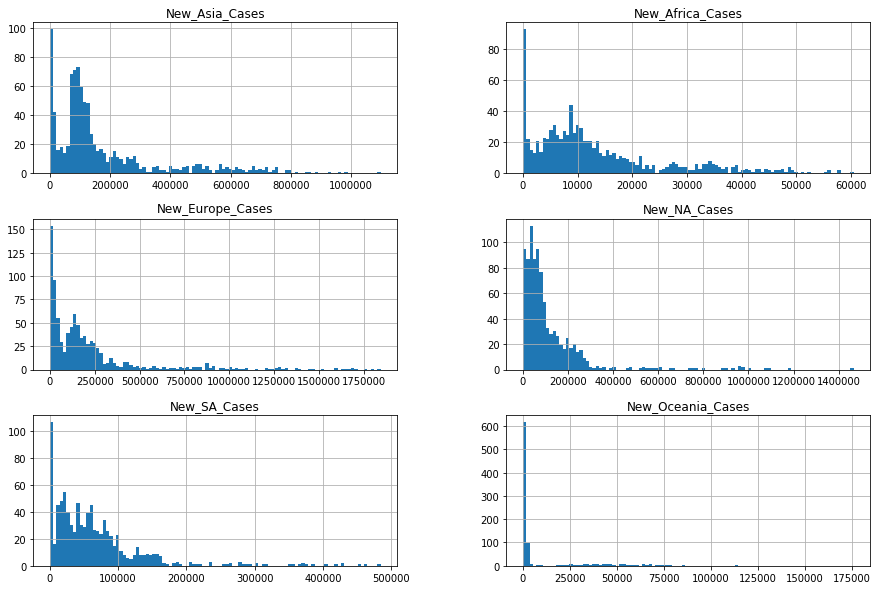

In [11]:
df_joined_Cases.hist(bins=100,figsize=(15, 10))

Covid deaths just like the cases look to be right skewed and bimodal in certain continents.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD17679D68>,
      dtype=object)

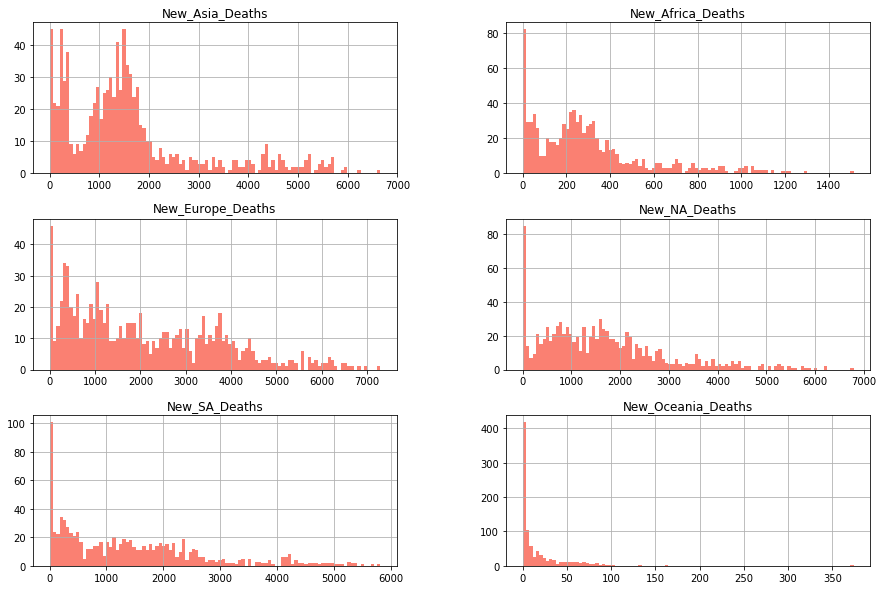

In [12]:
df_joined_Deaths=dff1[["New_Asia_Deaths","New_Africa_Deaths","New_Europe_Deaths","New_NA_Deaths","New_SA_Deaths","New_Oceania_Deaths"]]

df_joined_Deaths.hist(color='salmon',bins=100,figsize=(15, 10))

#### Boxplots
The boxplot is a type of plot that displays the five number summary of a dataset, which includes:the minimum value, first quartile (the 25th percentile), median value, third quartile (the 75th percentile), maximum value and outliers.
From the plot below, it can be showed that distribution of daily covid cases among all 6 continents were very different. Also the large number of outliers in each continent mirrors the right skewedness of all 6 continent histogram.

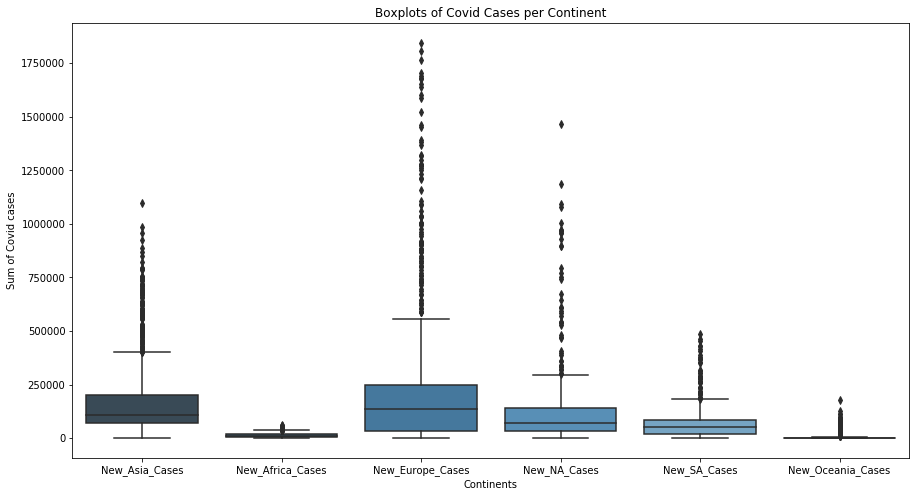

In [13]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
b = sns.boxplot(ax=ax, data = df_joined_Cases,palette="Blues_d").set(xlabel='Continents',ylabel='Sum of Covid cases',title='Boxplots of Covid Cases per Continent')


Box plot of daily covid death tend to mirror that of daily covid cases with the exception of Europe which has no outliers.

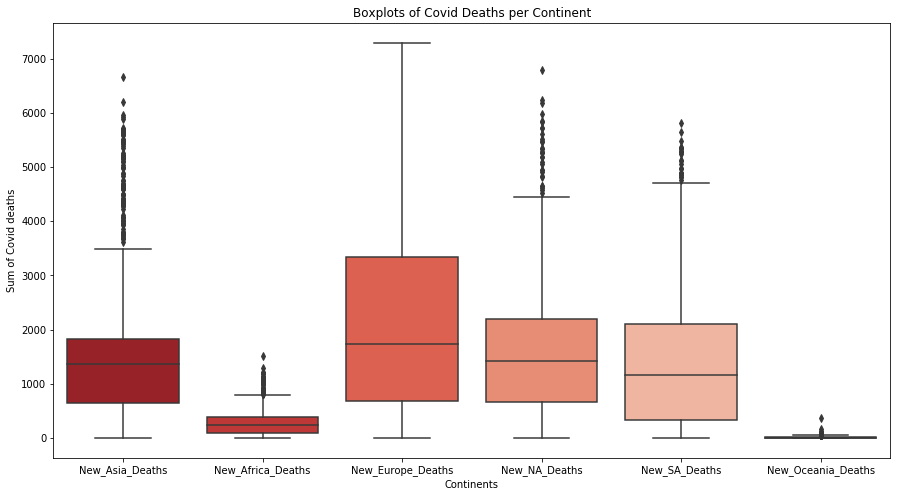

In [14]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
b = sns.boxplot(ax=ax, data = df_joined_Deaths,palette="Reds_r").set(xlabel='Continents',ylabel='Sum of Covid deaths',title='Boxplots of Covid Deaths per Continent')


#### Column Graph

The plot below shows total covid cases per each continent

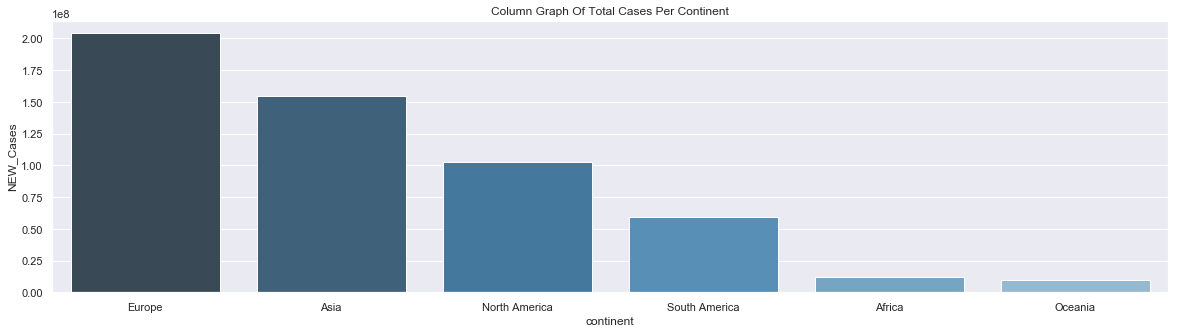

In [26]:
dee["continent"] = dee.index
de=dee.sort_values(by="NEW_Cases",ascending=False)
sns.set(rc={"figure.figsize":(20, 5)}) 
ax = sns.barplot(x="continent", y="NEW_Cases", data=de, palette="Blues_d").set(title='Column Graph Of Total Cases Per Continent')


Total covid deaths per continent is shown below

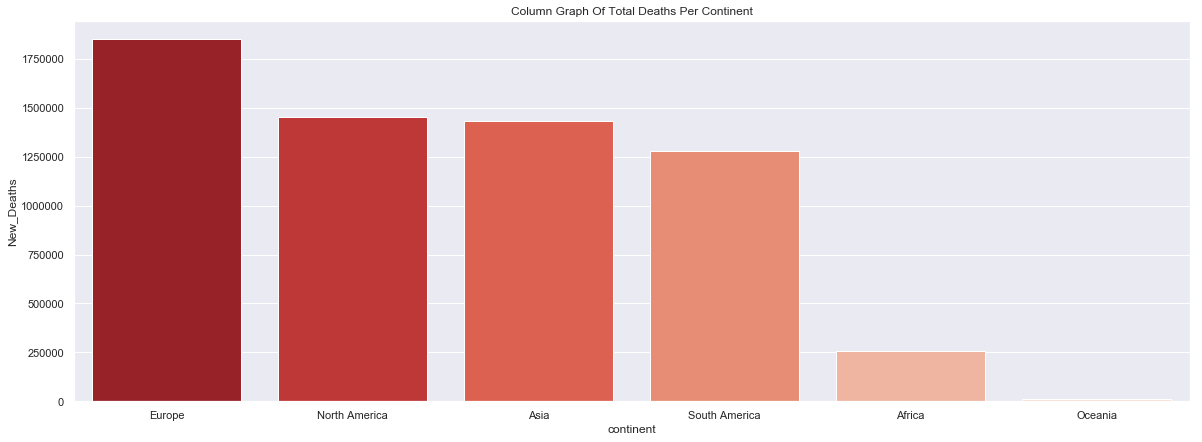

In [27]:
de=dee.sort_values(by="New_Deaths",ascending=False)
sns.set(rc={"figure.figsize":(20, 7)}) 
ax = sns.barplot(x="continent", y="New_Deaths", data=de, palette="Reds_r").set(title='Column Graph Of Total Deaths Per Continent')


#### Scatter plots

Scatter plots of covid deaths and cases show a strong correlation as expected for all 6 continents.

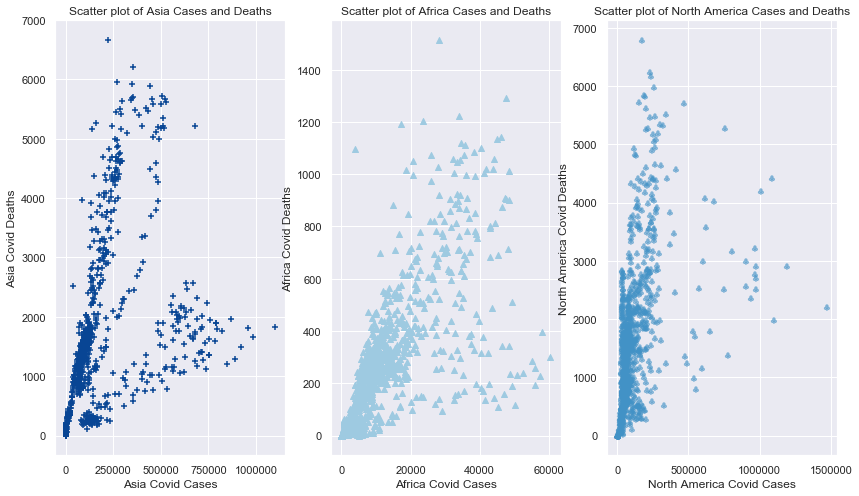

In [28]:
#Multi Grid Plots
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 8))
x=asi["New_Asia_Cases"]
y=asi["New_Asia_Deaths"]
x1=af["New_Africa_Cases"]
y1=af["New_Africa_Deaths"]
x2=na["New_NA_Cases"]
y2=na["New_NA_Deaths"]

ax1.scatter(x, y, marker = '+', color = '#084594')
ax1.set_title("Scatter plot of Asia Cases and Deaths")
ax1.set_xlabel('Asia Covid Cases')
ax1.set_ylabel('Asia Covid Deaths')

ax2.scatter(x1, y1, marker = '^', color = '#9ecae1')
ax2.set_title("Scatter plot of Africa Cases and Deaths")
ax2.set_xlabel('Africa Covid Cases')
ax2.set_ylabel('Africa Covid Deaths')

ax3.scatter(x2, y2, marker = '$\clubsuit$', color = '#4292c6',
            alpha = 0.5)
ax3.set_title("Scatter plot of North America Cases and Deaths")
ax3.set_xlabel('North America Covid Cases')
ax3.set_ylabel('North America Covid Deaths')

plt.show()

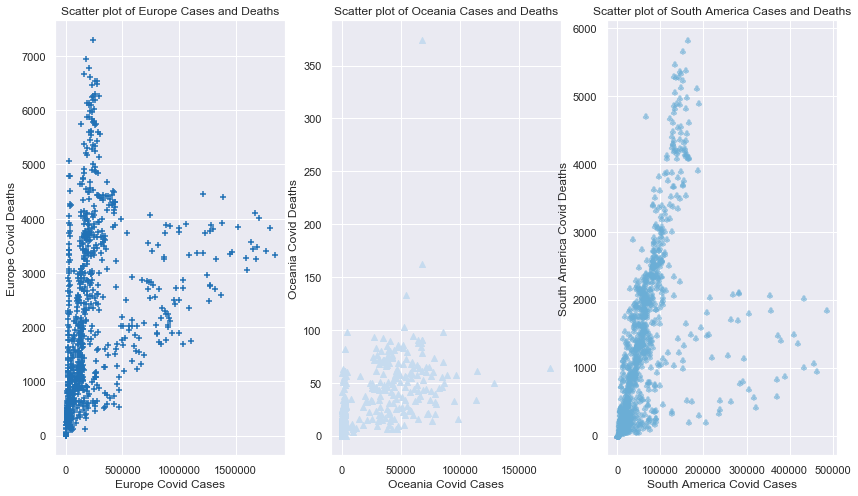

In [29]:
fix, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize = (14, 8))
x=eu["New_Europe_Cases"]
y=eu["New_Europe_Deaths"]
x1=oc["New_Oceania_Cases"]
y1=oc["New_Oceania_Deaths"]
x2=sa["New_SA_Cases"]
y2=sa["New_SA_Deaths"]

ax4.scatter(x, y, marker = '+', color = '#2171b5')
ax4.set_title("Scatter plot of Europe Cases and Deaths")
ax4.set_xlabel('Europe Covid Cases')
ax4.set_ylabel('Europe Covid Deaths')

ax5.scatter(x1, y1, marker = '^', color = '#c6dbef')
ax5.set_title("Scatter plot of Oceania Cases and Deaths")
ax5.set_xlabel('Oceania Covid Cases')
ax5.set_ylabel('Oceania Covid Deaths')

ax6.scatter(x2, y2, marker = '$\clubsuit$', color = '#6baed6',
            alpha = 0.5)
ax6.set_title("Scatter plot of South America Cases and Deaths")
ax6.set_xlabel('South America Covid Cases')
ax6.set_ylabel('South America Covid Deaths')

plt.show()

### 6. Close Connection

In [30]:
cursor = conn.cursor()
# some other statements  with the help of cursor
conn.close()